In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
def xls_b26_to_b10(x):
    # TODO: check for anything other than [a-z]    
    zero_offset = 96        # make offset from ord('a') > 0
    col_num = -1            # automatically covert for 0 to 1 based
    b26 = 26                # 'a-z' is base 26
    
    # make lower and reverse order
    x = x.lower()[::-1]
    
    # get each value at each power of base 26
    b26_vals = [b26**(i)*(ord(j) - zero_offset) for i, j in enumerate(x)]
    
    # add base 26 power values to column number and return
    col_num += np.array(b26_vals).sum()
    
    return col_num

In [18]:
# init data to be processed
f_name = "e:/projects/wpi/2017_07_27 Operating data.xlsx"
sheet_plg = 'Pivot LG'
sheet_beq = 'BW ES QSee'

# extract data to dataframe
df_plg = pd.read_excel(f_name, sheet_plg)
df_beq = pd.read_excel(f_name, sheet_beq)

In [29]:
# extract data labels
df_plg_labels = list(df_plg)
df_beq_labels = list(df_beq)
date = {"plg":df_plg_labels[0], "beq":df_beq_labels[0]}
avg_temp = {"plg":df_plg_labels[2], "beq":df_beq_labels[xls_b26_to_b10('M')]}
avg_pres = {"plg":df_plg_labels[3], "beq":df_beq_labels[xls_b26_to_b10('T')]}
norm_perm_flow = {"plg":df_plg_labels[5], "beq":df_beq_labels[xls_b26_to_b10('AD')]}
norm_salt = {"plg":df_plg_labels[6], "beq":df_beq_labels[xls_b26_to_b10('AE')]}

In [25]:
df_plg_labels

[u'Row Labels',
 u'Average of Feed Cond. (\xb5S/cm)',
 u'Average of Temp (\xb0C)',
 u'Average of Feed Press (psi)',
 u'Average of Perm. Cond. (\xb5S/cm)',
 u'Average of Normalized Permeate Flow (gpm)',
 u'Average of Normalized Salt  (%)\nPassage',
 u'Average of Perm TDS (ppm)',
 u'Average of Projected Permeate TDS (wet test, ppm)',
 u'Average of Projected Permeate TDS (specs, ppm)',
 u'Average of Projected FP (wet test, psi)',
 u'Average of Projected FP (specs, psi)',
 u'Average of A-Value [Specific Flux] (gfd/psi)',
 u'Average of Normalized Differential Pressure (psi)']

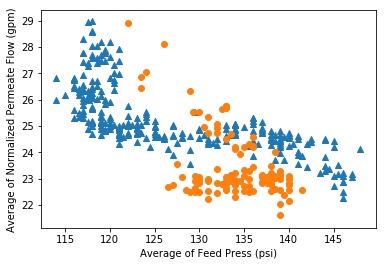

In [47]:
plt.close('all')

pres0 = df_plg[df_plg[date["plg"]] < '2017-3-15'][avg_pres["plg"]].values
pres1 = df_plg[df_plg[date["plg"]] > '2017-3-15'][avg_pres["plg"]].values
flow0 = df_plg[df_plg[date["plg"]] < '2017-3-15'][norm_perm_flow["plg"]].values
flow1 = df_plg[df_plg[date["plg"]] > '2017-3-15'][norm_perm_flow["plg"]].values

plt.figure()
plt.scatter(pres0, flow0, marker='^')
plt.scatter(pres1, flow1, marker='o')
plt.xlabel(avg_pres["plg"])
plt.ylabel(norm_perm_flow["plg"])
plt.show()

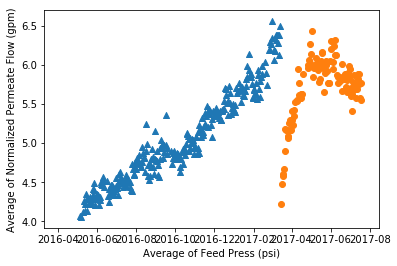

In [48]:
plt.close('all')

date0 = df_plg[df_plg[date["plg"]] < '2017-3-15'][date["plg"]].values
date1 = df_plg[df_plg[date["plg"]] > '2017-3-15'][date["plg"]].values
pres0 = df_plg[df_plg[date["plg"]] < '2017-3-15'][avg_pres["plg"]].values
pres1 = df_plg[df_plg[date["plg"]] > '2017-3-15'][avg_pres["plg"]].values
flow0 = df_plg[df_plg[date["plg"]] < '2017-3-15'][norm_perm_flow["plg"]].values
flow1 = df_plg[df_plg[date["plg"]] > '2017-3-15'][norm_perm_flow["plg"]].values

plt.figure()
plt.scatter(date0, pres0/flow0, marker='^')
plt.scatter(date1, pres1/flow1, marker='o')
plt.xlabel("time")
plt.ylabel(norm_perm_flow["plg"])
plt.show()

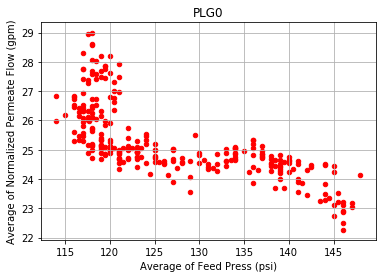

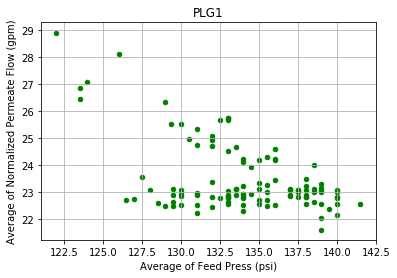

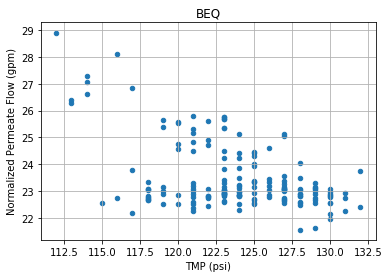

In [44]:
# scatter plot relation between
plt.close('all')
plt.figure()
df_plg[df_plg[date["plg"]] < '2017-3-15'].plot(x=avg_pres["plg"], y=norm_perm_flow["plg"], kind='scatter', title="PLG0", color='r')
plt.grid()
df_plg[df_plg[date["plg"]] > '2017-3-15'].plot(x=avg_pres["plg"], y=norm_perm_flow["plg"], kind='scatter', title="PLG1", color='g')
plt.grid()
df_beq[df_beq[date["beq"]] > '2017-3-15'].plot(x=avg_pres["beq"], y=norm_perm_flow["beq"], kind='scatter', title="BEQ")
plt.grid()
plt.show()

In [45]:
# scatter plot relation betweew
plt.close('all')
df_plg.plot(x=avg_temp, y=norm_salt, kind='scatter')
plt.grid()
plt.show()

TypeError: unhashable type: 'dict'